# 1. Error Function

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import integrate
from scipy.misc import derivative

$$ erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt. $$

* 위와 같이 주어지는 에러함수를 수치적분을 이용하여 구하고 그래프를 그려라. (어떤 방법을 이용하든 관계없음)

$$
\begin{align}
erf(x) &= \frac{2}{\pi} \sum_{n=0}^{\infty} \frac{ (-1)^n x^{2n+1}} { (2n+1) n!}  \\
&= \frac{2}{\pi} \left( x - \frac{x^3}{3} + \frac{x^5}{10} - \frac{x^7}{42} + \cdots \right)
\end{align}
$$

* 에러함수를 테일러 전개하면 위와 같이 주어진다. 위의 전개식과 적분결과를 그래프로 그리고 비교하여라.

In [2]:
def erf(x,n):
    sum=0
    t=0
    dt=x/n
    while abs(t)<abs(x):
        sum+=dt*(np.exp(-t**2))
        t+=dt
    return 2*sum/math.sqrt(np.pi)

def erf_t(x,N):
    sum=0
    n=0
    while n<=N:
        sum+=(-1)**n*x**(2*n+1)/(2*n+1)/math.factorial(n) 
        n+=1
    return 2*sum/math.sqrt(np.pi)

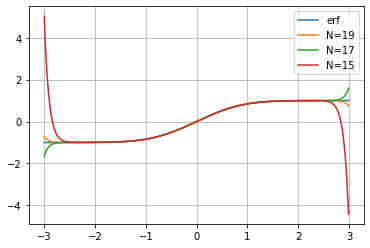

In [3]:
n=np.arange(-3,3,0.01)
#plt.plot(n,[math.erf(x) for x in n])
plt.plot(n,[erf(x,1000) for x in n],label='erf')
plt.plot(n,[erf_t(x,19) for x in n],label='N=19')
plt.plot(n,[erf_t(x,18) for x in n],label='N=17')
plt.plot(n,[erf_t(x,15) for x in n],label='N=15')
plt.legend()
plt.grid(True)

# 2. (Integration) Trigonometric Function
* sin, cos함수를 trapezoidal 방법을 이용하여 직접 적분하고 그래프를 그려라. 
* sin, cos함수를 scipy.integrate 함수를 이용하여 적분하고 그래프를 그려라.
  (구체적으로 $\int_0^x sin(t) dt$, $\int_0^x cos(t) dt$를 x에 대해서 그려라.)

In [4]:
def trapez(f,a,b,n):
    sum, t, dt = 0, a, (b-a)/n
    while(t<b):
        sum += dt*(0.5*f(t)+0.5*f(t+dt))
        t += dt
    return sum

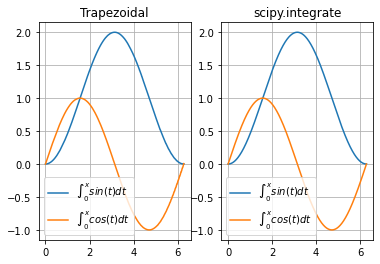

In [23]:
n1=np.linspace(0,2*np.pi,1000)
plt.subplot(121)
plt.title('Trapezoidal')
plt.plot(n1,[trapez(np.sin,0,x,1000) for x in n1],label='$\int_0^x sin(t) dt$')
plt.plot(n1,[trapez(np.cos,0,x,1000) for x in n1],label='$\int_0^x cos(t) dt$')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title('scipy.integrate')
plt.plot(n1,[integrate.quad(np.sin,0,x)[0] for x in n1],label='$\int_0^x sin(t) dt$')
plt.plot(n1,[integrate.quad(np.cos,0,x)[0] for x in n1],label='$\int_0^x cos(t) dt$')
plt.legend()
plt.grid(True)
plt.show()

# 3. (Differentiation) Trigonometric Function
* sin, cos함수의 도함수를 finite difference 방법을 이용하여 구현하고 그래프를 그려라.
* sin, cos함수의 도함수를 scipy.misc.derivative 함수를 이용하여 구하고 그래프를 그려라.

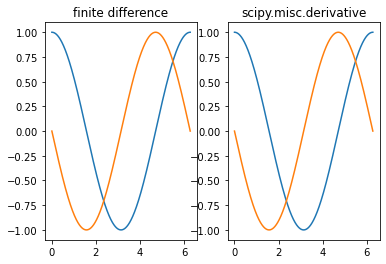

In [29]:
def cen_diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx
plt.subplot(1,2,1)
plt.title('finite difference')
plt.plot(n1,[cen_diff(np.sin,x,0.0001) for x in n1])
plt.plot(n1,[cen_diff(np.cos,x,0.0001) for x in n1])
plt.subplot(1,2,2)
plt.title('scipy.misc.derivative')
plt.plot(n1,[derivative(np.sin,x,dx=0.0001) for x in n1] )
plt.plot(n1,[derivative(np.cos,x,dx=0.0001) for x in n1] )
plt.show()

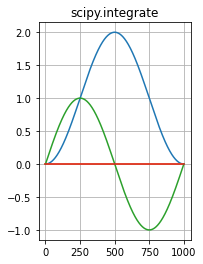

In [13]:
plt.subplot(1,2,1)
plt.title('scipy.integrate')
plt.plot([integrate.quad(np.sin,0,x) for x in n1],label='$\int_0^x sin(t) dt$')
plt.plot([integrate.quad(np.cos,0,x) for x in n1],label='$\int_0^x cos(t) dt$')
plt.grid(True)
plt.show()

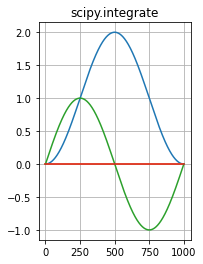

In [13]:
plt.subplot(1,2,1)
plt.title('scipy.integrate')
plt.plot([integrate.quad(np.sin,0,x) for x in n1],label='$\int_0^x sin(t) dt$')
plt.plot([integrate.quad(np.cos,0,x) for x in n1],label='$\int_0^x cos(t) dt$')
plt.grid(True)
plt.show()